# Central Limit Theorem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

In [2]:
# read in data
df = pd.read_csv('california_housing_train.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# select 'households' as the population of interest
population = df.households

In [5]:
# total number of datapoints in population
len(df)

20640

In [6]:
# population mean
population.mean()

499.5396802325581

<AxesSubplot:xlabel='households', ylabel='Count'>

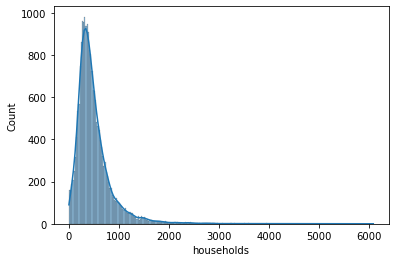

In [7]:
# population distribution
sns.histplot(population, kde=True)

In [8]:
def sample_means(population, samples, n):
    """Draw random samples from the population and calculate the sample means."""
    result = []
    for i in range(samples):
        sample = np.random.choice(population, size=n, replace=False)
        sample_mean = sample.mean()
        result.append(sample_mean)
    return result

def plot_hist_and_qq(means):
    """Plot histogram and QQ-plot."""
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    sns.histplot(means, kde=True, ax=axes[0])
    axes[1] = sm.qqplot(np.array(means), line='s', ax=axes[1])
    plt.show()

In [9]:
# let's assume we draw 1000 samples of varying size n from the population
num_samples = 1000

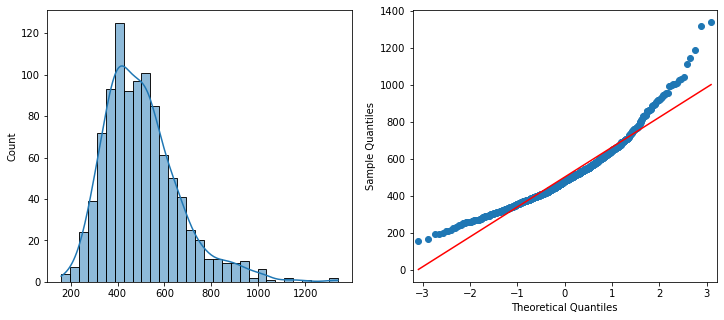

In [10]:
# sample size = 5 - way too off
n = 5
result = sample_means(population, samples=num_samples, n=n)
plot_hist_and_qq(result)

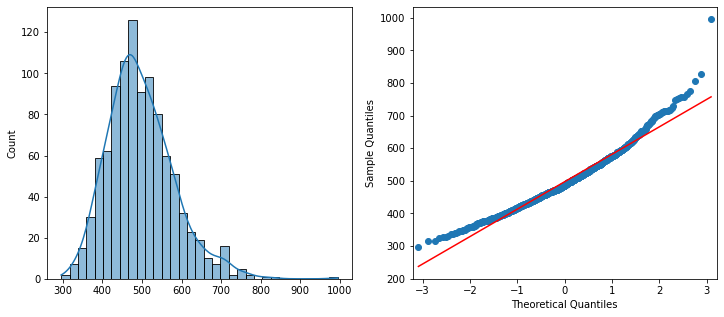

In [11]:
# sample size = 20 - still too off
n = 20
result = sample_means(population, samples=num_samples, n=n)
plot_hist_and_qq(result)

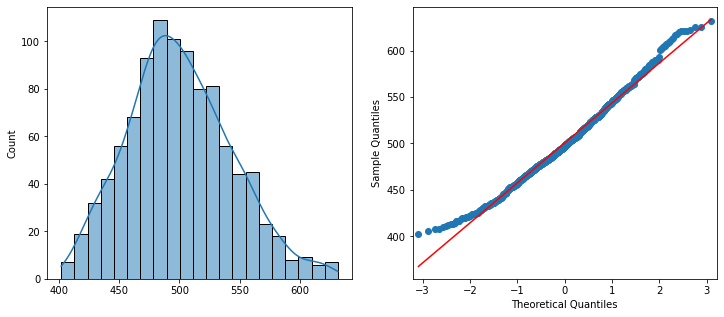

In [12]:
# sample size = 80 - eh, better, but still a little off
n = 80
result = sample_means(population, samples=num_samples, n=n)
plot_hist_and_qq(result)

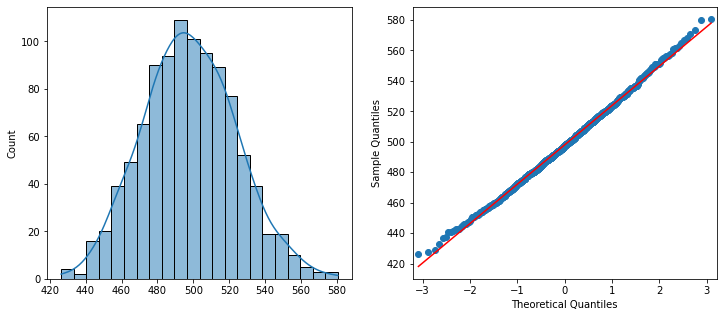

In [13]:
# sample size = 200 - enough sample size, the distribution is close to normal
n = 200
result = sample_means(population, samples=num_samples, n=n)
plot_hist_and_qq(result)